In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#import keras
from IPython.display import SVG
#from keras.optimizers import Adam
#from keras.utils.vis_utils import model_to_dot

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
DATAPATH = "data/"

In [6]:
dataset = pd.read_csv(DATAPATH+"cleaned_data_train.csv", names="user_id,movie_id,prediction".split(','))
dataset['user_id'] = dataset['user_id']-1
dataset['movie_id'] = dataset['movie_id']-1
dataset.head()

,user_id,movie_id,prediction
0,43,0,4
1,60,0,3
2,66,0,4
3,71,0,3
4,85,0,5


In [9]:
table=pd.pivot_table(dataset,values='prediction',index=['user_id'],columns=['movie_id'])

In [12]:
#matrix representation
matrix=table.fillna(0).values

In [15]:
label_positions=np.logical_not(matrix==0)

In [27]:
existing_labels=np.sum(label_positions, axis=0)

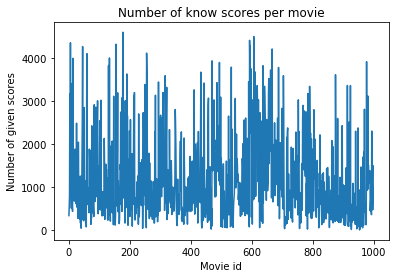

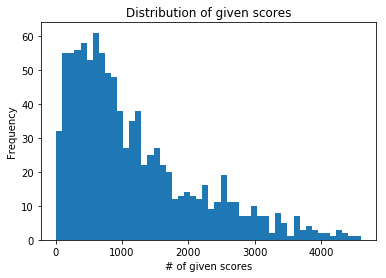

Number of movies unlabeled:  0


In [34]:
plt.plot(existing_labels)
plt.title('Number of know scores per movie')
plt.xlabel('Movie id')
plt.ylabel('Number of given scores')
plt.show()
plt.hist(existing_labels,bins=50)
plt.title('Distribution of given scores')
plt.xlabel('# of given scores')
plt.ylabel('Frequency')
plt.show()
print('Number of movies unlabeled: ', np.sum(existing_labels==0))

In [ ]:
def ALS_one_pass(matrix, label_positions,degree_expansion=1):
    # TODO if time is available: define the degree_expansion with kernel trick, -1 corresponds to exponential
    nb_samples,nb_features=label_positions.shape
    matrix_=matrix.copy()
    for i in range(nb_features):
        label_position=label_positions[:,i]
        regressor_pos=np.setdiff1d(np.arange(nb_features),[i])
        model=LinearRegression.fit(matrix_[label_position,regressor_pos],matrix_[label_position,i])
        matrix_[np.logical_not(label_positions),i]=model.predict[matrix_[np.logical_not(label_position)],regressor_pos]
    return matrix_
    